<div style="text-align: center;">
<h1>Programming Assignment 2</h1>
<h2>Digital Library of Arendelle</h2>
<b>Breno Poggiali de Sousa</b>
<h6>Universidade Federal de Minas Gerais (UFMG)</h6>
<h6>Belo Horizonte - MG - Brasil</h6>
<small>brenopoggiali@ufmg.br</small>
</div>

## 1. Introduction

The Arendelle's Digital Library is a project developed by the Plan of Democratization of the Education Access (PDEA). This project aims to guarantee all the Arendelle people the right of information access from the Internet.
The problem proposed by Elsa, Arendelle's Queen, was to develop an efficient sort algorithm that could be able to sort the huge Arendelle's Digital Library. Since it is a massive amount of books, we need to find an effective quicksort variation that could be able to sort the book fast and, in this paper, we will try to compare many quick sort variations to give the final report to Elsa about which is the most effective one.

## 2. Implementation

All the quicksort implementations were developed in C++ and compiled by G++ of GNU Compiler Collection

### 2.1 Data Structure

Most of the QuickSorts were designed using a recursive implementation, except for the last one that we used a **Stack** to simulate the recursive implementation. A recursive implementation is when some function calls itself and it always needs to have a stop condition. After we achieve the stop condition, the last function starts to return to its predecessor and so on. Just like pushing elements to a Stack and then popping it until it gets empty.

So this is what is happening inside a stack:

![Stack Implementation](./Lifo_stack.png)

In this example of an implementation of a Stack of length equals to 6, we first push all the 6 elements and then, when the stop condition is reached, we start to pop each element out, until the end of the stack.

Ok, but which are these elements that we are pushing and popping out of the stack?
These elements, in our case, were the left and right edges of our vector. Considering that our vector represents each of our books.

Since we are using quicksort implementations, we are always dividing our vector in half and, these elements that we are pushing and popping, are the left and right corners of the divided vector.

We will explain more about QuickSort implementations latter on this paper.

## 2.2 Classes

Keeping in mind the idea of letting our program more modular, we tried to separate the whole program in some classes. We divided it into two main classes besides our `main.cpp` These two classes are:

### 2.2.1 Array

In our array class, we tried to develop all of our QuickSort implementations and all our array handling. We initialize this class passing only the size of the array and it auto creates an ascending ordered array and set `moves = 0` and `comparisons = 0`. If we are trying to use and descending ordered or a shuffled array, we only call `desc_array()` or `shuffle_array()` respectively. 

Then, when we call any quicksort but non recursive quicksort, we call the `quicksort()` function passing the following parameters: `(unsigned int* A, int esq, int dir, int type, int k)`, where `A` is our Array of elements, `esq` and `dir` are the left and right edges of our array that we are looking for, `type` is the type of our pivot that we are using and k is the percentage of the vector that we will use in case of doing the Insertion QuickSort (look that if that is not the case, we set k=0 and we will never satisfy the if that call the insertion sort).

In the case that we are looking for the non recursive quicksort, we call the `quicksort_non_recursive` that acts pretty similar as the quicksort function that we saw above, **except** that we only need to pass `type` and `k`, since, in this case, we will only have one case (pivot = the middle element and k = 0 - since we are not doing a non recursive insertion sort). And, of course, rather than calling itself, this function has a while that only stops when the stack that it created is empty

The other functions do pretty much what their name is saying: 

* `which_pivot()` returns the pivot of the quicksort case that we are trying to do.
* `print_array()` print the array (we use it when -p is passed)
* `get_moves()` and `get_comparisons()` returns the number of moves and comparisons that was calculated during the quicksorts.
* `get_median()` gets the median of the array (we use this when we are getting the median of the sorted time array)

And, of course, all the other functions: 
`get_qc()`, `get_qm3()`, `get_qpe()`, `get_qi()`, `get_qnr()` calls the quicksort functions with the right parameters.


### 2.2.2 Stack

The class Stack is much more simple than Array class. It has the minimal functions necessary to create a stack and allow us to use it. Popping and Pushing elements of it. 

Our constructor here sets the top of the Stack to 0 and creates a stack of the size that was passed (in our case, the size of elements in the array).

Then we have the `push()` function that pushes the edges to the Stack (the left and the right edges). And sets `top = top + 1`

And the `pop()` function that return theses edges. And sets `top = top - 1`

And last but not least, we have the `is_empty()` function that returns a boolean of whether the Stack is empty or not. 

## 2.3 Quick Sorts

### 2.3.1 Classic Quick Sort
As we can see from the graphs above, this was the quicksort with the best efficiency and it definitely is the one that Elza is looking for. It uses the central element of each array as its pivot.

### 2.3.2 Median of 3 Quick Sort
This quicksort uses the median between the first, the middle and the last elements as its pivot. But as we can see from the results, we don't have enough efficiency gain and it is a little slower than the classic one. 

### 2.3.3 First element Quick Sort
Wow.. this is one of the most painful quicksorts in terms of computational cost. Especially when we look at the OrdC or the OrdD times, we can see here that it can take over to 5 minutes ordering one ascending vector of 500,000 elements. Here, of course, we use the first element of an array as the pivot.

### 2.3.4 Insertion Quick Sort
Here we have sort of a hybrid implementation. Since we use quick sort's implementation until the vector has `k%` elements and then, we call an insertion sort algorithm, we have a little bit of lower efficiency when compared to the classic one. Here we use the middle element as the pivot.

One interesting fact here is that, when we get bigger `k`'s, we have a considerative lower of efficiency. Which take us to the conclusion that the quicksort algorithm is much more efficient than the insertion sort one.


### 2.3.5 Non-recursive Quick Sort
Here we have an implementation that tries to simulate the Classic Quick Sort and that's because we have such a good result. Therefore, since we are implementing a Stack by hand, our efficiency gets a little bit lower than the Classic one.

## 4. Speed analysis

In this session, we will compare all quicksorts and see which one is the best for Elsa to use.

### 4.1 Timing

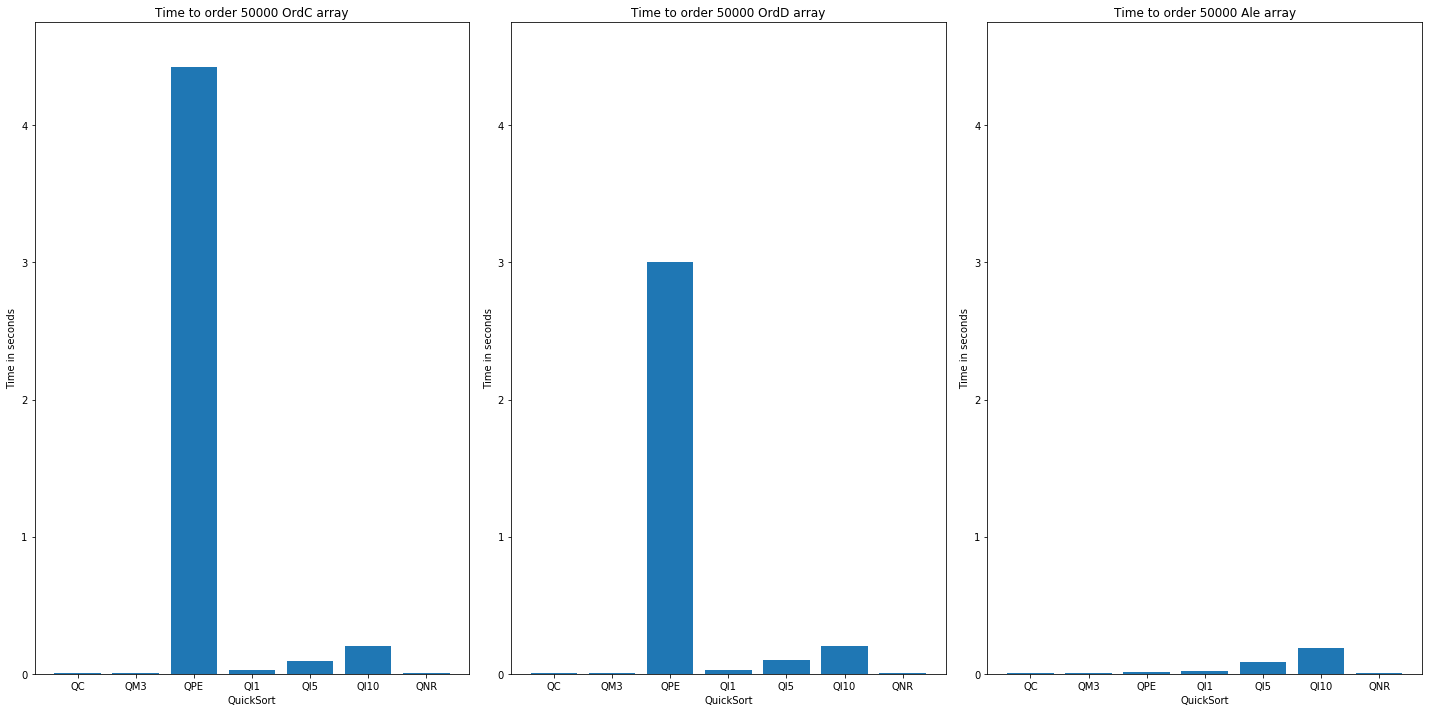

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize']  = (20, 10)

df = pd.read_csv('./results.txt', sep=" ", header=None)
df.columns = ["quickSort", "type", "size", "comparisons", "moves", "time"]

qs_50 = df[df['size'] == 50000]
qs_50_ale = qs_50[qs_50['type'] == 'Ale']
qs_50_ordc = qs_50[qs_50['type'] == 'OrdC']
qs_50_ordd = qs_50[qs_50['type'] == 'OrdD']


ax = plt.subplot(1, 3, 1)
plt.bar(qs_50_ordc['quickSort'], qs_50_ordc['time']/1000000)
plt.title('Time to order 50000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,4.75)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_50_ordd['quickSort'], qs_50_ordd['time']/1000000)
plt.title('Time to order 50000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,4.75)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_50_ale['quickSort'], qs_50_ale['time']/1000000)
plt.title('Time to order 50000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,4.75)

plt.tight_layout()
plt.show()

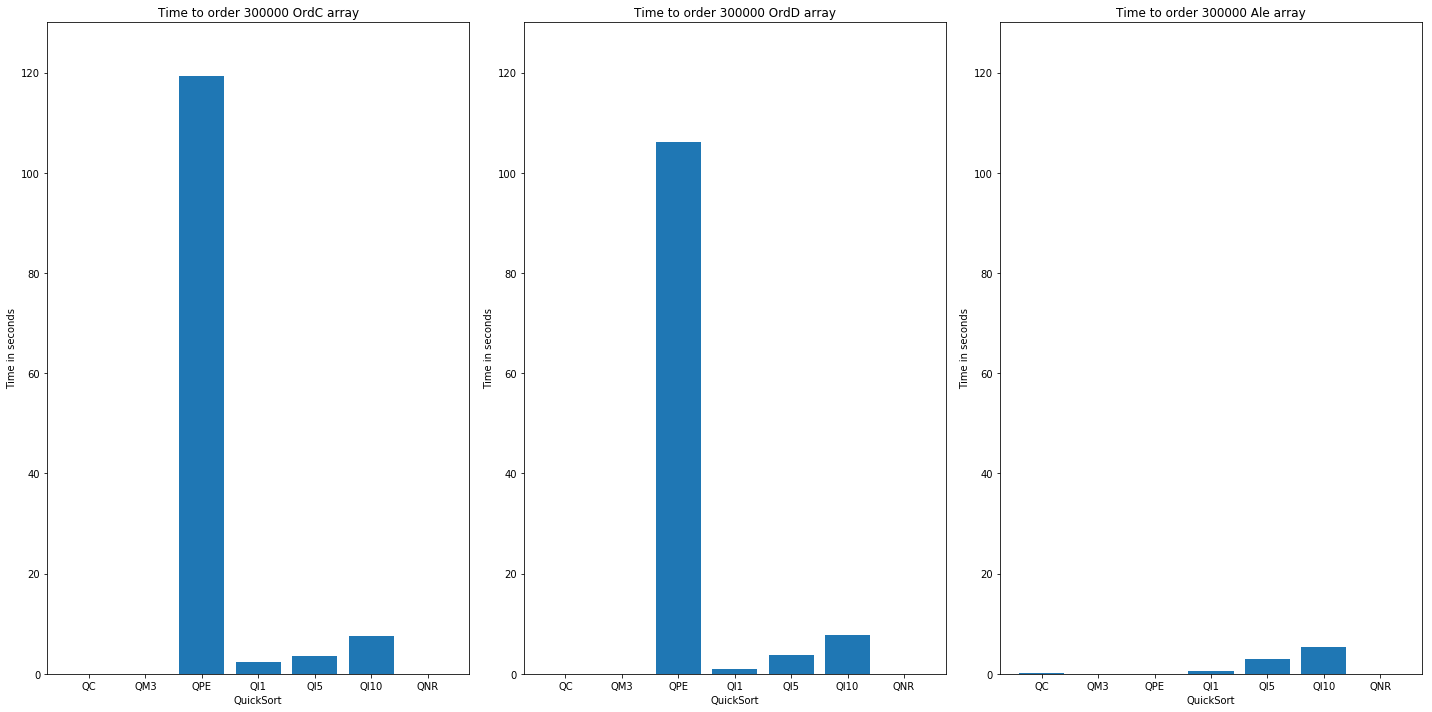

In [14]:
qs_300 = df[df['size'] == 300000]
qs_300_ale = qs_300[qs_300['type'] == 'Ale']
qs_300_ordc = qs_300[qs_300['type'] == 'OrdC']
qs_300_ordd = qs_300[qs_300['type'] == 'OrdD']

ax = plt.subplot(1, 3, 1)
plt.bar(qs_300_ordc['quickSort'], qs_300_ordc['time']/1000000)
plt.title('Time to order 300000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,130)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_300_ordd['quickSort'], qs_300_ordd['time']/1000000)
plt.title('Time to order 300000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,130)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_300_ale['quickSort'], qs_300_ale['time']/1000000)
plt.title('Time to order 300000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,130)

plt.tight_layout()
plt.show()

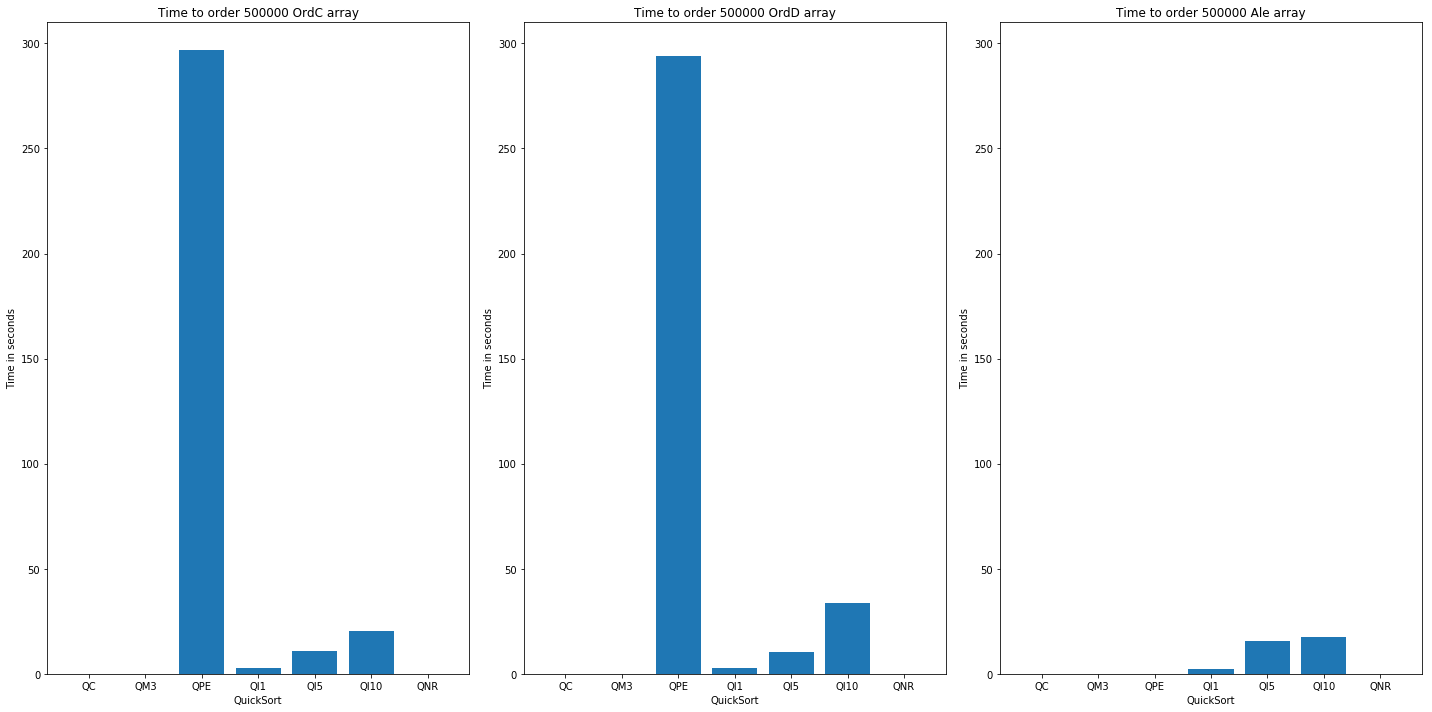

In [15]:
qs_500 = df[df['size'] == 500000]
qs_500_ale = qs_500[qs_500['type'] == 'Ale']
qs_500_ordc = qs_500[qs_500['type'] == 'OrdC']
qs_500_ordd = qs_500[qs_500['type'] == 'OrdD']

ax = plt.subplot(1, 3, 1)
plt.bar(qs_500_ordc['quickSort'], qs_500_ordc['time']/1000000)
plt.title('Time to order 500000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,310)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_500_ordd['quickSort'], qs_500_ordd['time']/1000000)
plt.title('Time to order 500000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,310)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_500_ale['quickSort'], qs_500_ale['time']/1000000)
plt.title('Time to order 500000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,310)

plt.tight_layout()
plt.show()

#### 4.1.1 The worst timing scenario

Looking at the graphs above, we just saw that the QPE (First element QuickSort) is the **slowest** one. The worst scenario in this QS is the OrdC one, but we can see here that, when we get bigger vectors, the timing of OrdC and OrdD gets more similar.

It is interesting to look here as well that, when we use QPE in a shuffled array (Ale), our timing is actually pretty ok, compared to the ordered ones. This occurs, because, since we are using the first element as the pivot, in the worst case (ordered array), rather than go until the half of the array and then split, O(n log n), the array is only split when it goes through all the array. So we have an O(n²).

#### 4.1.2 The best timing scenario

According to our graphs, the quicksorts QC, QM3 and QNR are pretty similar. So we will plot only these 3 to compare them. We will plot only the 500000 length array because is the largest and we can see better the differences between them.**

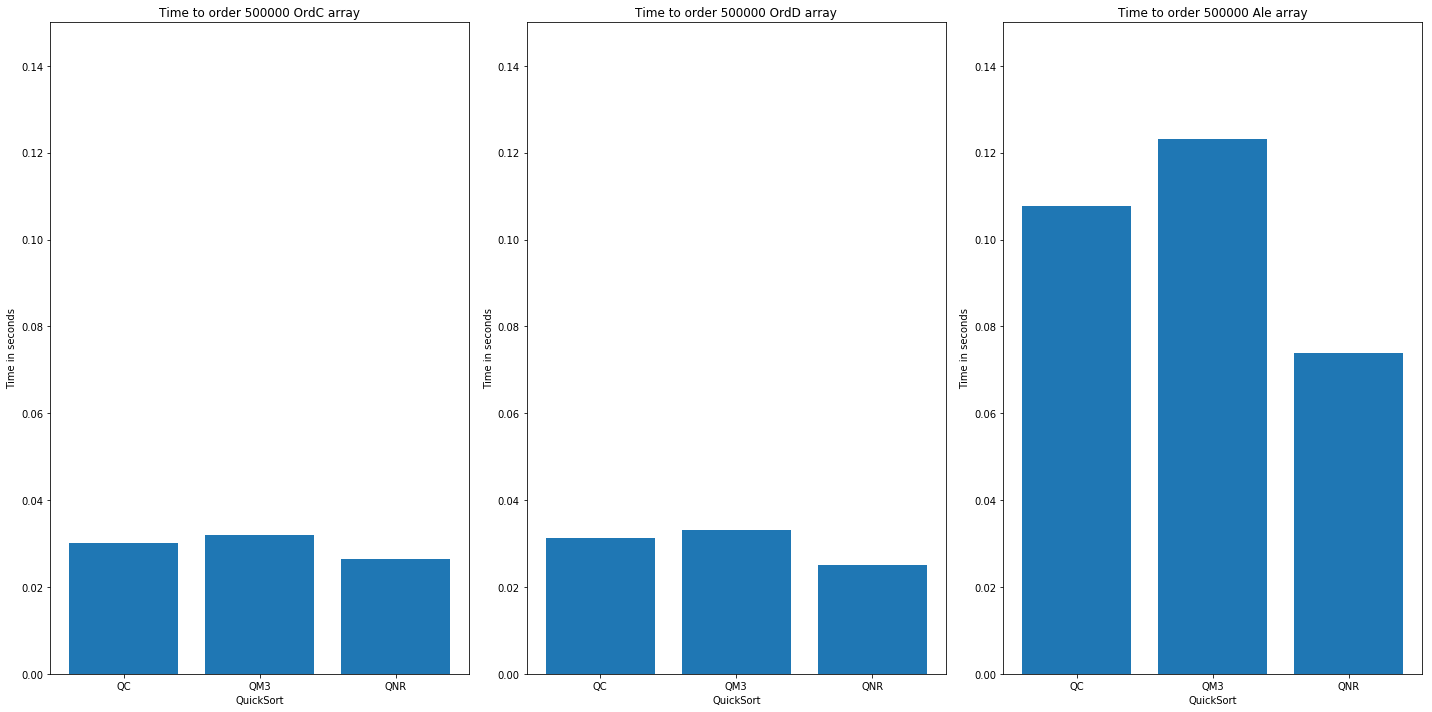

In [16]:
qs_500 = df[(df['size'] == 500000) & (df['quickSort'].isin(['QC', 'QM3', 'QNR']))]
qs_500
qs_500_ale = qs_500[qs_500['type'] == 'Ale']
qs_500_ordc = qs_500[qs_500['type'] == 'OrdC']
qs_500_ordd = qs_500[qs_500['type'] == 'OrdD']

ax = plt.subplot(1, 3, 1)
plt.bar(qs_500_ordc['quickSort'], qs_500_ordc['time']/1000000)
plt.title('Time to order 500000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,0.15)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_500_ordd['quickSort'], qs_500_ordd['time']/1000000)
plt.title('Time to order 500000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,0.15)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_500_ale['quickSort'], qs_500_ale['time']/1000000)
plt.title('Time to order 500000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('Time in seconds')
plt.ylim(0,0.15)

plt.tight_layout()
plt.show()

Now we can see that the fastest timing is the QNR (Non-recursive QuickSort) one. This can be explained, maybe, because the recursive function isn't doing only what it should do - since it is only one function for all the recursive quicksort cases.

### 4.2 Moves

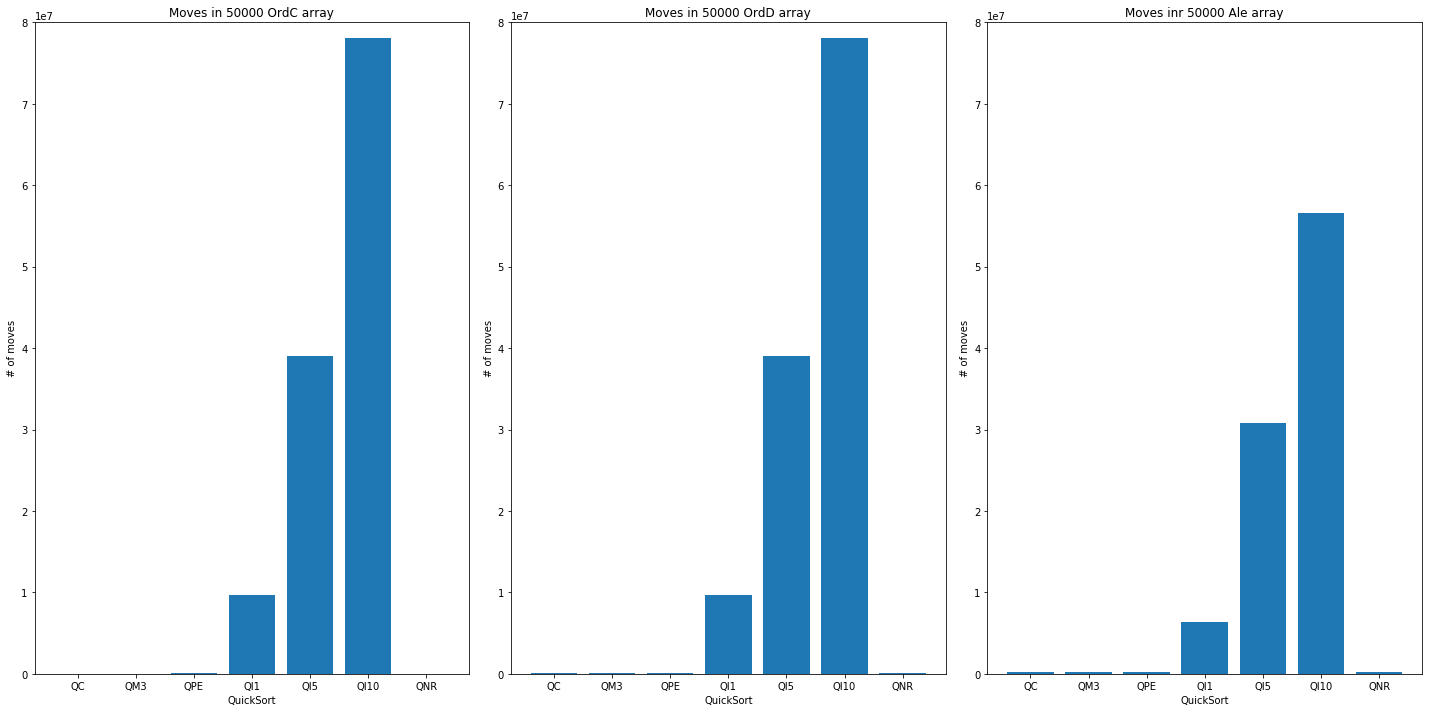

In [17]:
qs_50 = df[df['size'] == 50000]
qs_50_ale = qs_50[qs_50['type'] == 'Ale']
qs_50_ordc = qs_50[qs_50['type'] == 'OrdC']
qs_50_ordd = qs_50[qs_50['type'] == 'OrdD']


ax = plt.subplot(1, 3, 1)
plt.bar(qs_50_ordc['quickSort'], qs_50_ordc['moves'])
plt.title('Moves in 50000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,8e7)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_50_ordd['quickSort'], qs_50_ordd['moves'])
plt.title('Moves in 50000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,8e7)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_50_ale['quickSort'], qs_50_ale['moves'])
plt.title('Moves inr 50000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,8e7)

plt.tight_layout()
plt.show()

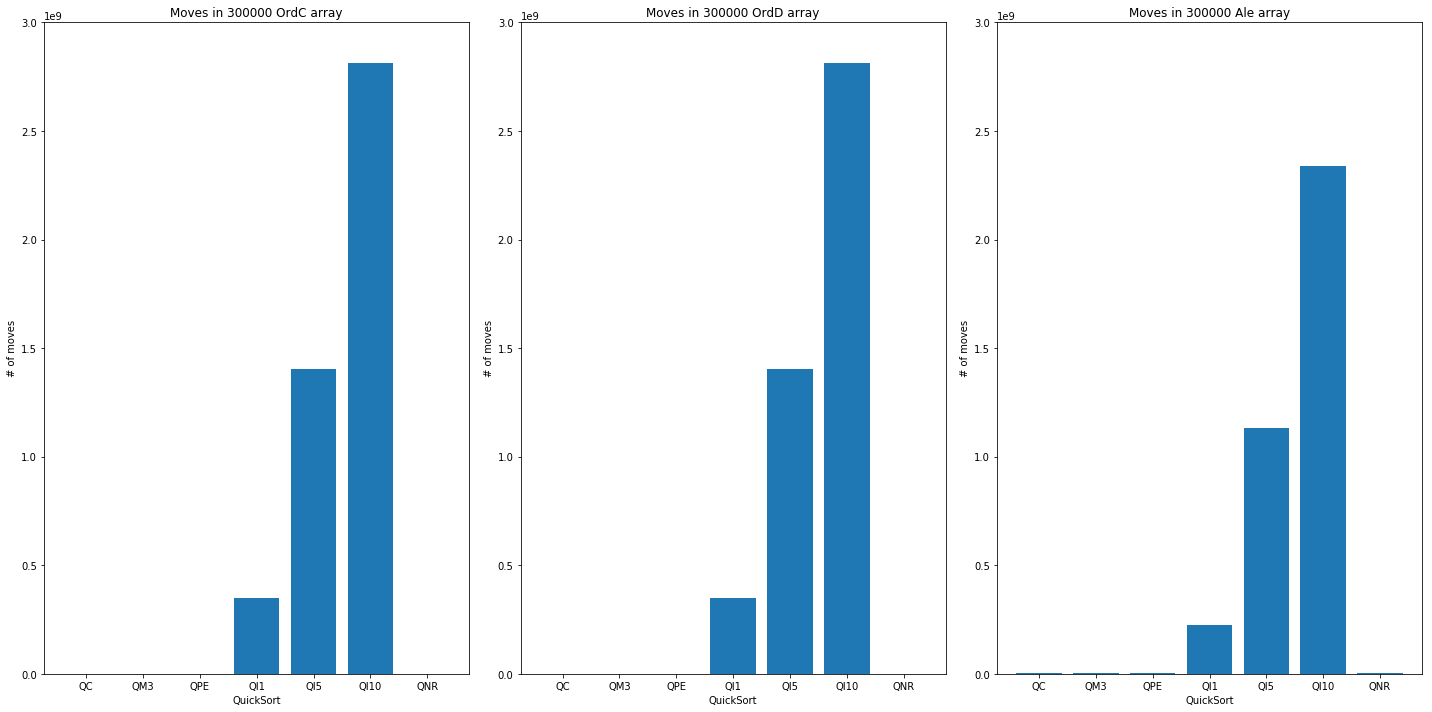

In [18]:
qs_300 = df[df['size'] == 300000]
qs_300_ale = qs_300[qs_300['type'] == 'Ale']
qs_300_ordc = qs_300[qs_300['type'] == 'OrdC']
qs_300_ordd = qs_300[qs_300['type'] == 'OrdD']

ax = plt.subplot(1, 3, 1)
plt.bar(qs_300_ordc['quickSort'], qs_300_ordc['moves'])
plt.title('Moves in 300000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0, 3e9)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_300_ordd['quickSort'], qs_300_ordd['moves'])
plt.title('Moves in 300000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0, 3e9)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_300_ale['quickSort'], qs_300_ale['moves'])
plt.title('Moves in 300000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0, 3e9)

plt.tight_layout()
plt.show()

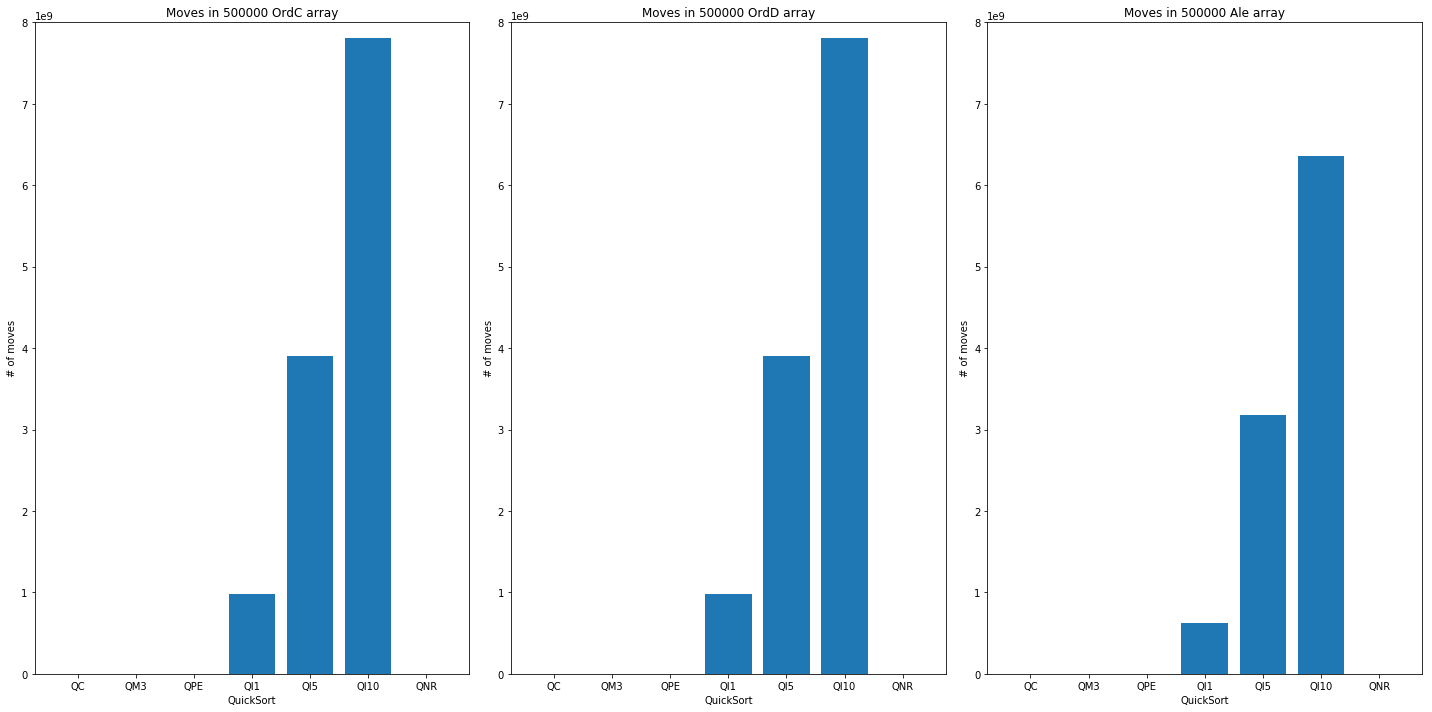

In [19]:
qs_500 = df[df['size'] == 500000]
qs_500_ale = qs_500[qs_500['type'] == 'Ale']
qs_500_ordc = qs_500[qs_500['type'] == 'OrdC']
qs_500_ordd = qs_500[qs_500['type'] == 'OrdD']

ax = plt.subplot(1, 3, 1)
plt.bar(qs_500_ordc['quickSort'], qs_500_ordc['moves'])
plt.title('Moves in 500000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,8e9)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_500_ordd['quickSort'], qs_500_ordd['moves'])
plt.title('Moves in 500000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,8e9)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_500_ale['quickSort'], qs_500_ale['moves'])
plt.title('Moves in 500000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,8e9)

plt.tight_layout()
plt.show()

#### 4.2.1 The worst moving scenario

Looking at the graphs above, we just saw that the QI (Insertion Quicksort) is the one with most moves. This was the expected result since the insertion quicksort uses the insertion implementation and it is the most costly in terms of movements. The QI10 is higher, of course, because the QI10 uses more Insertion than the QI5 and QI1.

Here we can see that the ordered ones are the most costly as well, because, in these cases, the worst scenario happens more times than the random one.

#### 4.2.2 The best moving scenario

According to our graphs, the quicksorts QC, QM3, QPE and QNR are pretty similar. So we will plot only these 4 to compare them. We will plot only the 500000 length array because is the largest and we can see better the differences between them.

In [1]:
qs_500 = df[(df['size'] == 500000) & (df['quickSort'].isin(['QC', 'QM3', 'QPE', 'QNR']))]
qs_500
qs_500_ale = qs_500[qs_500['type'] == 'Ale']
qs_500_ordc = qs_500[qs_500['type'] == 'OrdC']
qs_500_ordd = qs_500[qs_500['type'] == 'OrdD']

ax = plt.subplot(1, 3, 1)
plt.bar(qs_500_ordc['quickSort'], qs_500_ordc['moves'])
plt.title('Moves in 500000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,2.6e6)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_500_ordd['quickSort'], qs_500_ordd['moves'])
plt.title('Moves in 500000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,2.6e6)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_500_ale['quickSort'], qs_500_ale['moves'])
plt.title('Moves in 500000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,2.6e6)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

Now, we can see that the count of movements of these 4 is pretty similar. And, because of this, we can't guarantee that one is much better than the other. Anyway, we can see here, that now, the ordered case has a considerative less number of moves.

### 4.3 Comparison

In [2]:
qs_50 = df[df['size'] == 50000]
qs_50_ale = qs_50[qs_50['type'] == 'Ale']
qs_50_ordc = qs_50[qs_50['type'] == 'OrdC']
qs_50_ordd = qs_50[qs_50['type'] == 'OrdD']


ax = plt.subplot(1, 3, 1)
plt.bar(qs_50_ordc['quickSort'], qs_50_ordc['comparisons'])
plt.title('Comparisons in 50000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('# of comparisons')
plt.ylim(0, 1.3e9)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_50_ordd['quickSort'], qs_50_ordd['comparisons'])
plt.title('Comparisons in 50000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('# of comparisons')
plt.ylim(0, 1.3e9)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_50_ale['quickSort'], qs_50_ale['comparisons'])
plt.title('Comparisons in 50000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('# of comparisons')
plt.ylim(0, 1.3e9)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [3]:
qs_300 = df[df['size'] == 300000]
qs_300_ale = qs_300[qs_300['type'] == 'Ale']
qs_300_ordc = qs_300[qs_300['type'] == 'OrdC']
qs_300_ordd = qs_300[qs_300['type'] == 'OrdD']

ax = plt.subplot(1, 3, 1)
plt.bar(qs_300_ordc['quickSort'], qs_300_ordc['comparisons'])
plt.title('Comparisons in 300000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('# of comparisons')
plt.ylim(0, 5e10)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_300_ordd['quickSort'], qs_300_ordd['comparisons'])
plt.title('Comparisons in 300000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('# of comparisons')
plt.ylim(0, 5e10)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_300_ale['quickSort'], qs_300_ale['comparisons'])
plt.title('Comparisons in 300000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('# of comparisons')
plt.ylim(0, 5e10)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [4]:
qs_500 = df[df['size'] == 500000]
qs_500_ale = qs_500[qs_500['type'] == 'Ale']
qs_500_ordc = qs_500[qs_500['type'] == 'OrdC']
qs_500_ordd = qs_500[qs_500['type'] == 'OrdD']

ax = plt.subplot(1, 3, 1)
plt.bar(qs_500_ordc['quickSort'], qs_500_ordc['comparisons'])
plt.title('Moves in 500000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0,1.3e11)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_500_ordd['quickSort'], qs_500_ordd['comparisons'])
plt.title('Moves in 500000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0, 1.3e11)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_500_ale['quickSort'], qs_500_ale['comparisons'])
plt.title('Moves in 500000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('# of moves')
plt.ylim(0, 1.3e11)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

#### 4.3.1 The worst comparison scenario

Here we have exactly what we expected. Since the QPE is using the first element of each vector as the pivot, it will be the one, for sure with most comparisons in the worst case (ordered arrays). In the shuffled one, we have the insertion quicksort as the worst case, because, in the insertion sort, we are always comparing to see when to stop, meanwhile in the QPE, since we have a shuffled array, we will find faster one case the finish the for. 

#### 4.3.2 The best comparison scenario

According to our graphs, the quicksorts QC, QM3 and QNR are pretty similar. So we will plot only these 3 to compare them. We will plot only the 500000 length array because is the largest and we can see better the differences between them.

In [5]:
qs_500 = df[(df['size'] == 500000) & (df['quickSort'].isin(['QC', 'QM3', 'QNR']))]
qs_500
qs_500_ale = qs_500[qs_500['type'] == 'Ale']
qs_500_ordc = qs_500[qs_500['type'] == 'OrdC']
qs_500_ordd = qs_500[qs_500['type'] == 'OrdD']

ax = plt.subplot(1, 3, 1)
plt.bar(qs_500_ordc['quickSort'], qs_500_ordc['comparisons'])
plt.title('Comparisons in 500000 OrdC array')
plt.xlabel('QuickSort')
plt.ylabel('# of comparisons')
plt.ylim(0,1.4e7)

ax = plt.subplot(1, 3, 2)
plt.bar(qs_500_ordd['quickSort'], qs_500_ordd['comparisons'])
plt.title('Comparisons in 500000 OrdD array')
plt.xlabel('QuickSort')
plt.ylabel('# of comparisons')
plt.ylim(0,1.4e7)

ax = plt.subplot(1, 3, 3)
plt.bar(qs_500_ale['quickSort'], qs_500_ale['comparisons'])
plt.title('Comparisons in 500000 Ale array')
plt.xlabel('QuickSort')
plt.ylabel('# of comparisons')
plt.ylim(0,1.4e7)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

Here we can see that in the ordered array they are pretty similar (since the QM3 will always have its pivot as the array in the middle element). But we can see that the QM3, in the shuffled one has a slightly smaller number of comparisons. This can be explained by the fact that since it gets the median between 3 numbers, we always get the one that is more in the middle. 

## 5Conclusion

To finish this paper and to give a decent solution to Elsa, we can confirm that the **common quickSort** is definitely the better solution for the queen of Arendelle's program. And, just to be clear, when we refer to the common quickSort, we are referring to the QC and the QNR, that uses the same implementation. This because they both have a very good and similar performance when dealing with big numbers in all the scenarios. 

Elsa may prefer to use the QC because it's implementation is easier since she doesn't need to create a Stack to simulate the recursive function. And also, when developing a function to deal only with the QC case, she might get a little performance gain.

## References

Ziviani, N. (2006). *Projetos de Algoritmos com Implementações em PASCAL e C:*
<div style="margin-left: 30px;">*Capítulo 4: Ordenação*. Editora Cengage.</div>


